In [1]:
import pandas as pd
df = pd.read_csv('Debernardi et al 2020 data.csv')
df.head()

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


In [2]:
import pandas as pd

# Load the data
data = pd.read_csv('Debernardi et al 2020 data.csv')

# Display the first few rows of the dataframe
print(data.head())

# Get information about the columns and data types
print(data.info())

# Check for missing values
print(data.isnull().sum())

  sample_id patient_cohort sample_origin  age sex  diagnosis stage  \
0        S1        Cohort1          BPTB   33   F          1   NaN   
1       S10        Cohort1          BPTB   81   F          1   NaN   
2      S100        Cohort2          BPTB   51   M          1   NaN   
3      S101        Cohort2          BPTB   61   M          1   NaN   
4      S102        Cohort2          BPTB   62   M          1   NaN   

  benign_sample_diagnosis  plasma_CA19_9  creatinine     LYVE1      REG1B  \
0                     NaN           11.7     1.83222  0.893219   52.94884   
1                     NaN            NaN     0.97266  2.037585   94.46703   
2                     NaN            7.0     0.78039  0.145589  102.36600   
3                     NaN            8.0     0.70122  0.002805   60.57900   
4                     NaN            9.0     0.21489  0.000860   65.54000   

         TFF1     REG1A  
0  654.282174  1262.000  
1  209.488250   228.407  
2  461.141000       NaN  
3  142.95000

In [3]:
import pandas as pd


# Handle missing values
data['plasma_CA19_9'].fillna(data['plasma_CA19_9'].median(), inplace=True)
data['stage'].fillna('Unknown', inplace=True)
data['benign_sample_diagnosis'].fillna('Unknown', inplace=True)
data['REG1A'].fillna(0, inplace=True)
# Encode the 'sex' column as a categorical variable
data['sex'] = data['sex'].astype('category')



# Print missing values after handling
print(data.isnull().sum())


sample_id                  0
patient_cohort             0
sample_origin              0
age                        0
sex                        0
diagnosis                  0
stage                      0
benign_sample_diagnosis    0
plasma_CA19_9              0
creatinine                 0
LYVE1                      0
REG1B                      0
TFF1                       0
REG1A                      0
dtype: int64


In [4]:
documentation = pd.read_csv('Debernardi et al 2020 documentation.csv')
print(documentation)

                Column name                     Original column name  \
0                 sample_id                                Sample ID   
1            patient_cohort                         Patient's Cohort   
2             sample_origin                            Sample Origin   
3                       age                                      Age   
4                       sex                                      Sex   
5                 diagnosis  Diagnosis (1=Control, 2=Benign, 3=PDAC)   
6                     stage                                    Stage   
7   benign_sample_diagnosis                 Benign Samples Diagnosis   
8             plasma_CA19_9                       Plasma CA19-9 U/ml   
9                creatinine                         Creatinine mg/ml   
10                    LYVE1                              LYVE1 ng/ml   
11                    REG1B                              REG1B ng/ml   
12                     TFF1                               TFF1 n

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Step 1: Load the data from CSV file
data = pd.read_csv('Debernardi et al 2020 data.csv')

# Step 2: Handle Missing Data with Simple Imputer
imputer = SimpleImputer(strategy='mean')
data[['plasma_CA19_9', 'REG1A']] = imputer.fit_transform(data[['plasma_CA19_9', 'REG1A']])

# Step 3: Feature Selection
X = data[['creatinine', 'LYVE1', 'REG1B', 'TFF1', 'age', 'sex', 'REG1A']]
y = data['diagnosis']

# Step 4: Feature Engineering (if needed)
X_copy = X.copy()  # Create a copy to avoid the SettingWithCopyWarning
X_copy['sex'].replace({'M': 0, 'F': 1}, inplace=True)

# Step 5: Data Split (optional, for modeling)
# X_train, X_test, y_train, y_test = train_test_split(X_copy, y, test_size=0.2, random_state=42)

# Now, the data is preprocessed, and you can proceed with modeling or any other analysis.


In [7]:
import pandas as pd

# Assuming you have already loaded and preprocessed the data into 'X_copy' and 'y'

# Combine the features and target variable into a single DataFrame
data = pd.concat([X_copy, y], axis=1)

# Calculate Pearson correlation coefficients
correlations = data.corr()

# Correlation with the target variable (diagnosis)
target_correlation = correlations['diagnosis'].drop('diagnosis')

# Sort the correlations in descending order
sorted_correlation = target_correlation.abs().sort_values(ascending=False)

# Print the sorted correlation values
print(sorted_correlation)

LYVE1         0.540384
TFF1          0.392613
REG1B         0.383516
age           0.308251
REG1A         0.191509
sex           0.169081
creatinine    0.074888
Name: diagnosis, dtype: float64


Based on the correlation values, LYVE1 has the highest positive correlation with the target variable, suggesting that it may be an important feature for predicting pancreatic cancer. TFF1 and REG1B also have moderate positive correlations. On the other hand, creatinine has a weak positive correlation, indicating a less significant relationship with the target variable.


LYVE1' has a moderate positive correlation with 'diagnosis' (0.540384).
'TFF1' has a moderate positive correlation with 'diagnosis' (0.392613).
'REG1B' has a moderate positive correlation with 'diagnosis' (0.383516).
'age' has a moderate positive correlation with 'diagnosis' (0.308251).
'plasma_CA19_9' has a weak positive correlation with 'diagnosis' (0.263950).
'REG1A' has a weak positive correlation with 'diagnosis' (0.260110).
'creatinine' has a very weak positive correlation with 'diagnosis' (0.074888).

       creatinine       LYVE1        REG1B          TFF1         age  \
count  590.000000  590.000000   590.000000    590.000000  590.000000   
mean     0.855383    3.063530   111.774090    597.868722   59.079661   
std      0.639028    3.438796   196.267110   1010.477245   13.109520   
min      0.056550    0.000129     0.001104      0.005293   26.000000   
25%      0.373230    0.167179    10.757216     43.961000   50.000000   
50%      0.723840    1.649862    34.303353    259.873974   60.000000   
75%      1.139482    5.205037   122.741013    742.736000   69.000000   
max      4.116840   23.890323  1403.897600  13344.300000   89.000000   

              REG1A   diagnosis  
count    590.000000  590.000000  
mean     735.281222    2.027119  
std     1063.030198    0.804873  
min        0.000000    1.000000  
25%      195.201000    1.000000  
50%      735.281222    2.000000  
75%      735.281222    3.000000  
max    13200.000000    3.000000  


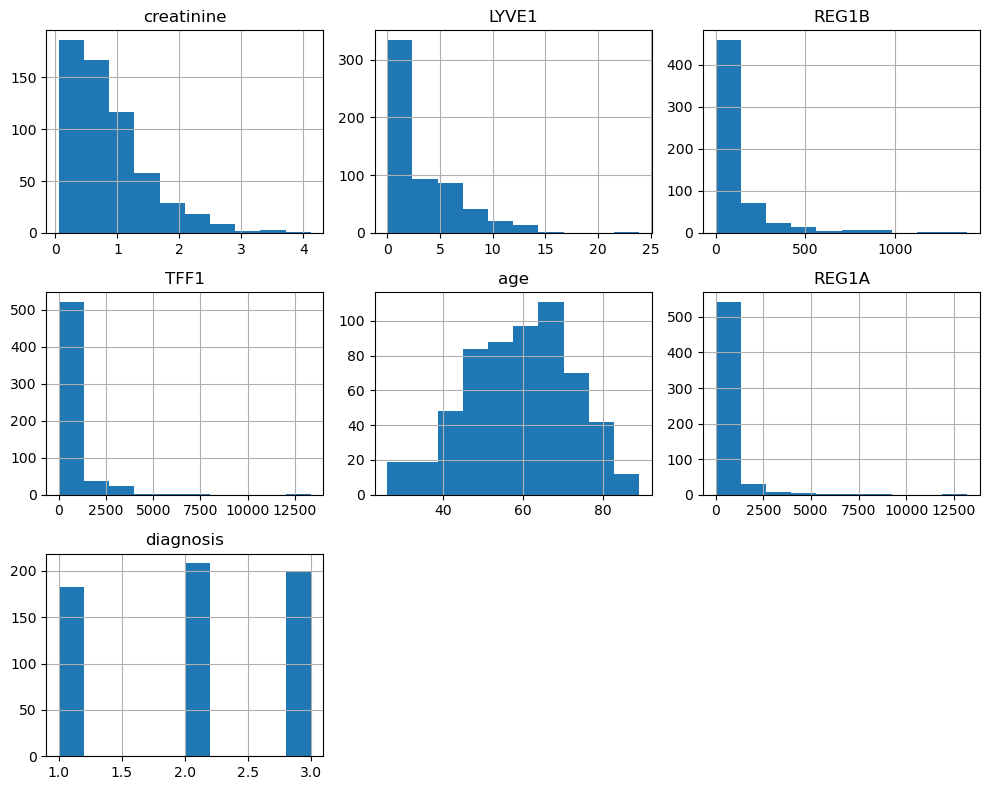

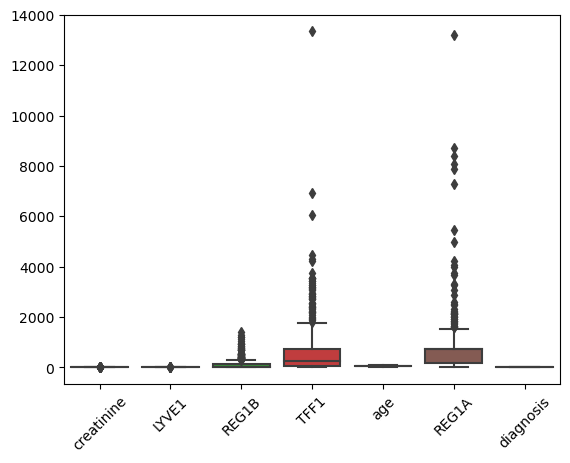

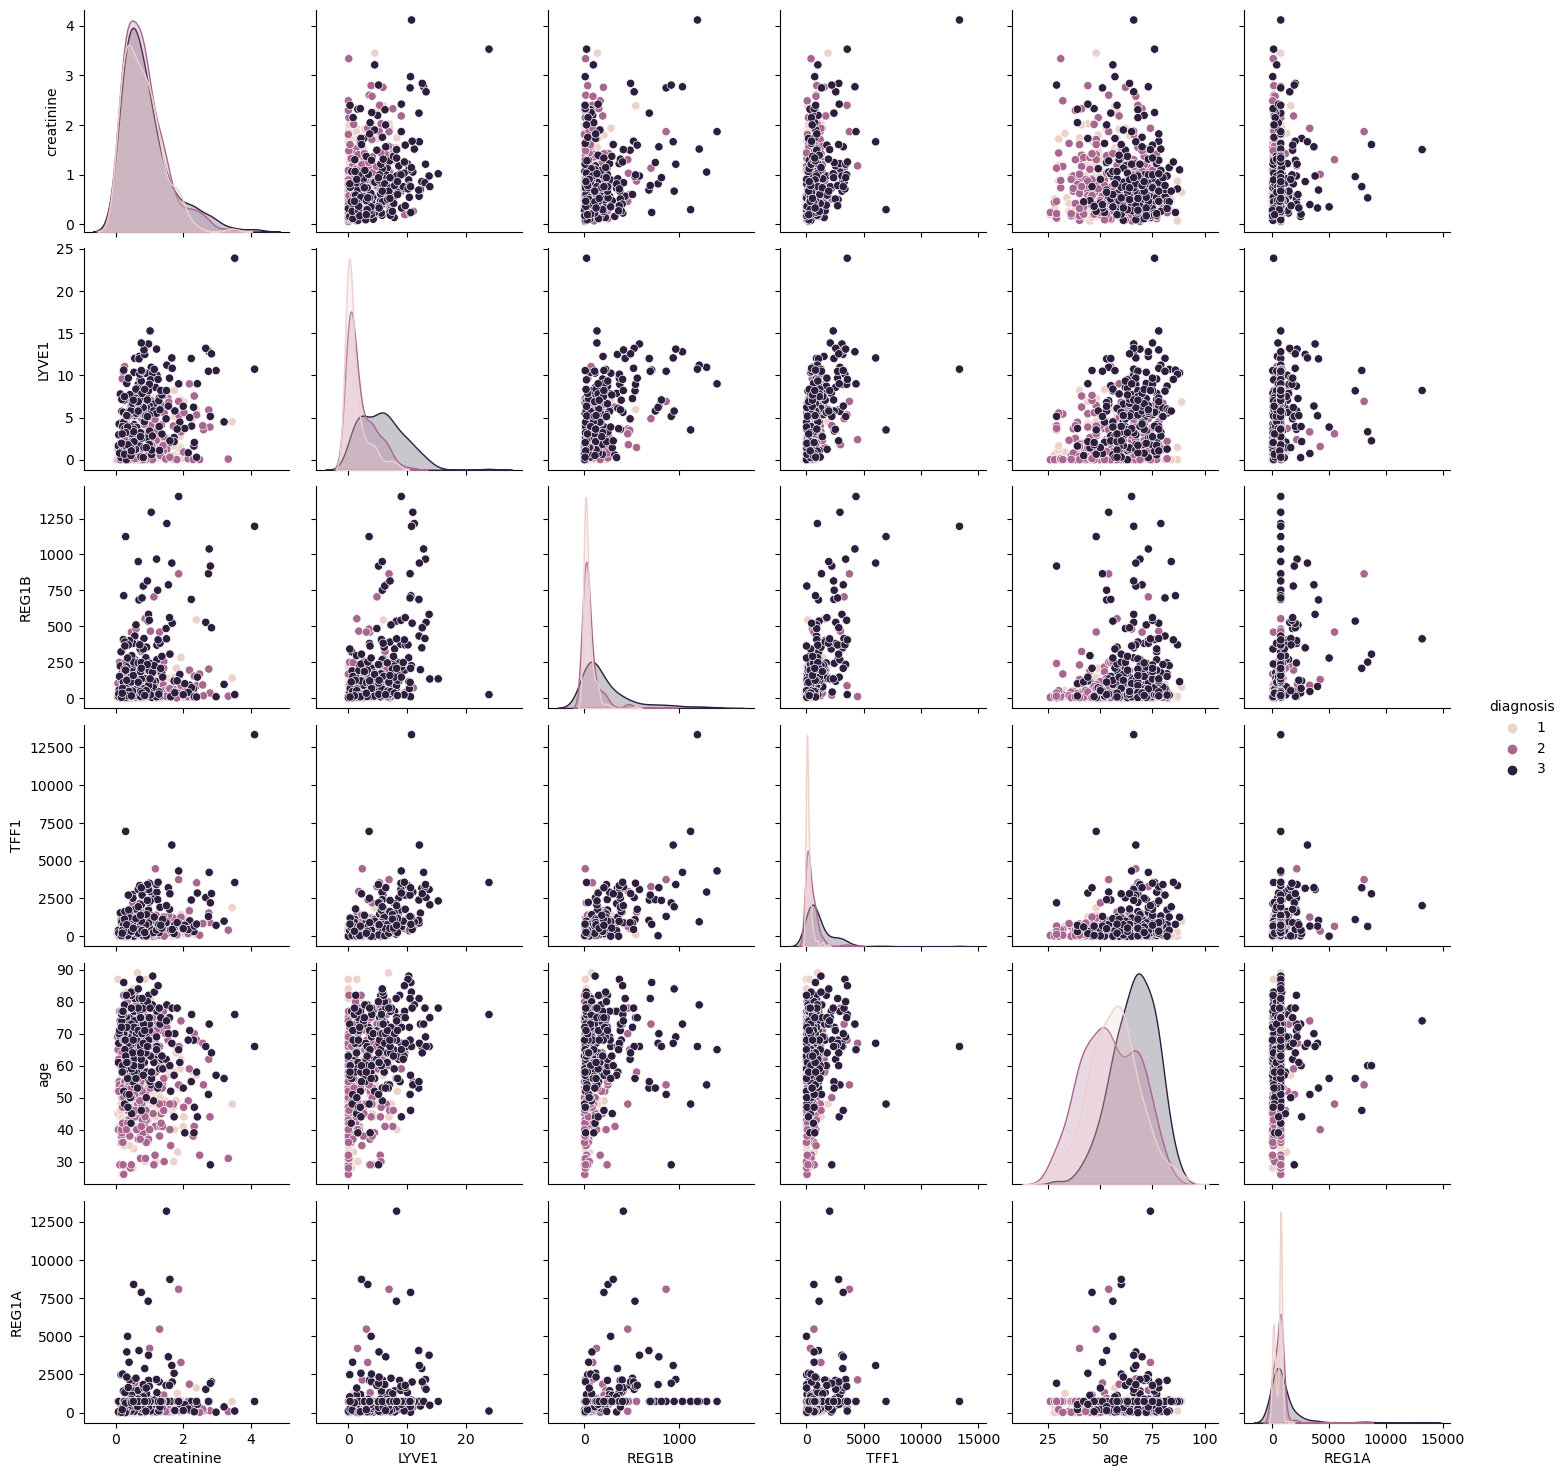

/var/folders/01/75h4kx1s6mdbs13q9d9n9r780000gn/T/ipykernel_10318/513173414.py:28: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


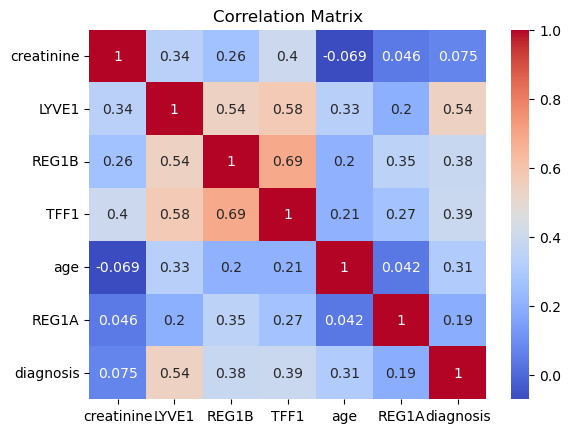

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already preprocessed the data and obtained X and y

# Combine the features and target variable into a single DataFrame
data = pd.concat([X, y], axis=1)

# Descriptive Statistics
print(data.describe())

# Histograms
data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Box Plots
sns.boxplot(data=data.drop(['sex'], axis=1))
plt.xticks(rotation=45)
plt.show()

# Scatter Plots with Target Variable
sns.pairplot(data=data, hue='diagnosis', diag_kind='kde')
plt.show()

# Correlation Matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Descriptive Statistics:
              age   diagnosis  plasma_CA19_9  creatinine       LYVE1  \
count  590.000000  590.000000     590.000000  590.000000  590.000000   
mean    59.079661    2.027119     654.002944    0.855383    3.063530   
std     13.109520    0.804873    1870.760130    0.639028    3.438796   
min     26.000000    1.000000       0.000000    0.056550    0.000129   
25%     50.000000    1.000000      17.000000    0.373230    0.167179   
50%     60.000000    2.000000     654.002944    0.723840    1.649862   
75%     69.000000    3.000000     654.002944    1.139482    5.205037   
max     89.000000    3.000000   31000.000000    4.116840   23.890323   

             REG1B          TFF1  
count   590.000000    590.000000  
mean    111.774090    597.868722  
std     196.267110   1010.477245  
min       0.001104      0.005293  
25%      10.757216     43.961000  
50%      34.303353    259.873974  
75%     122.741013    742.736000  
max    1403.897600  13344.300000  


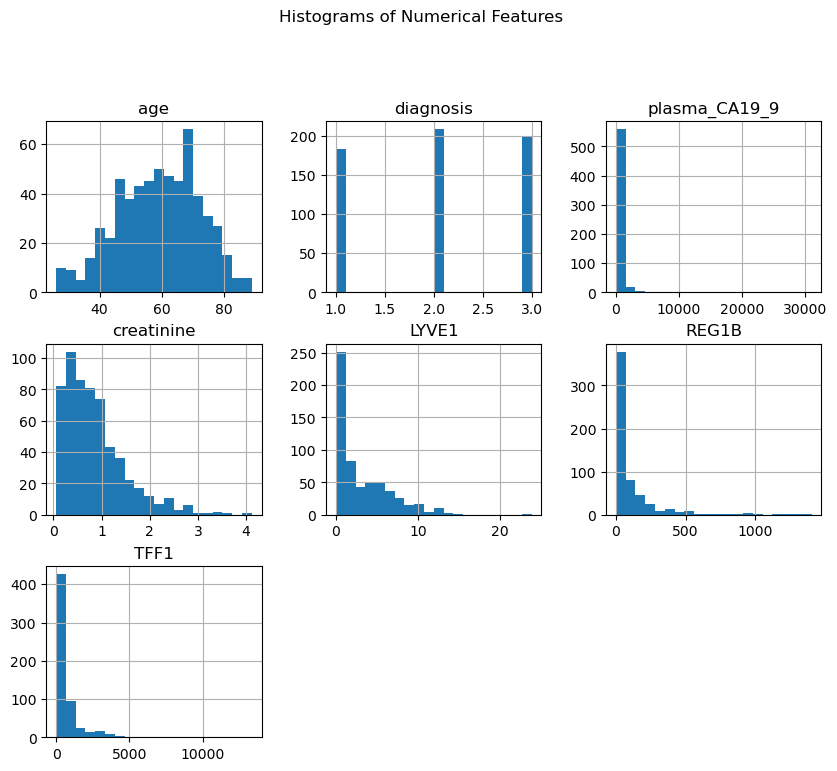

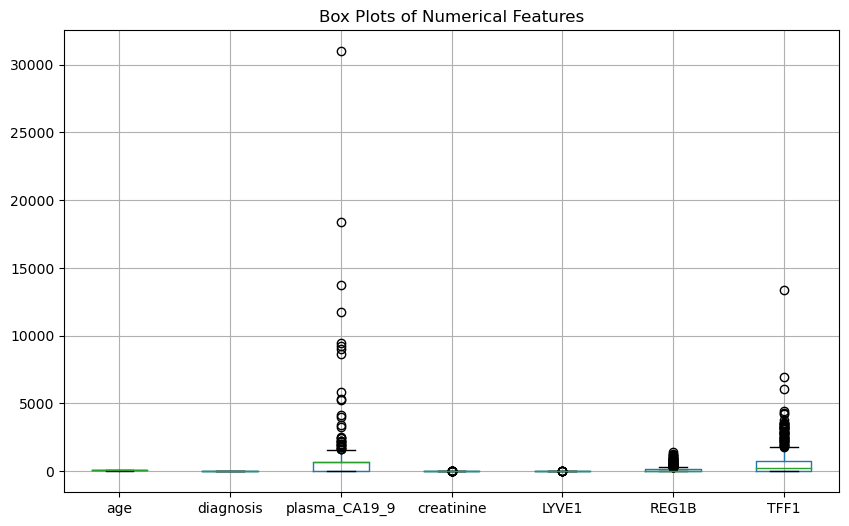

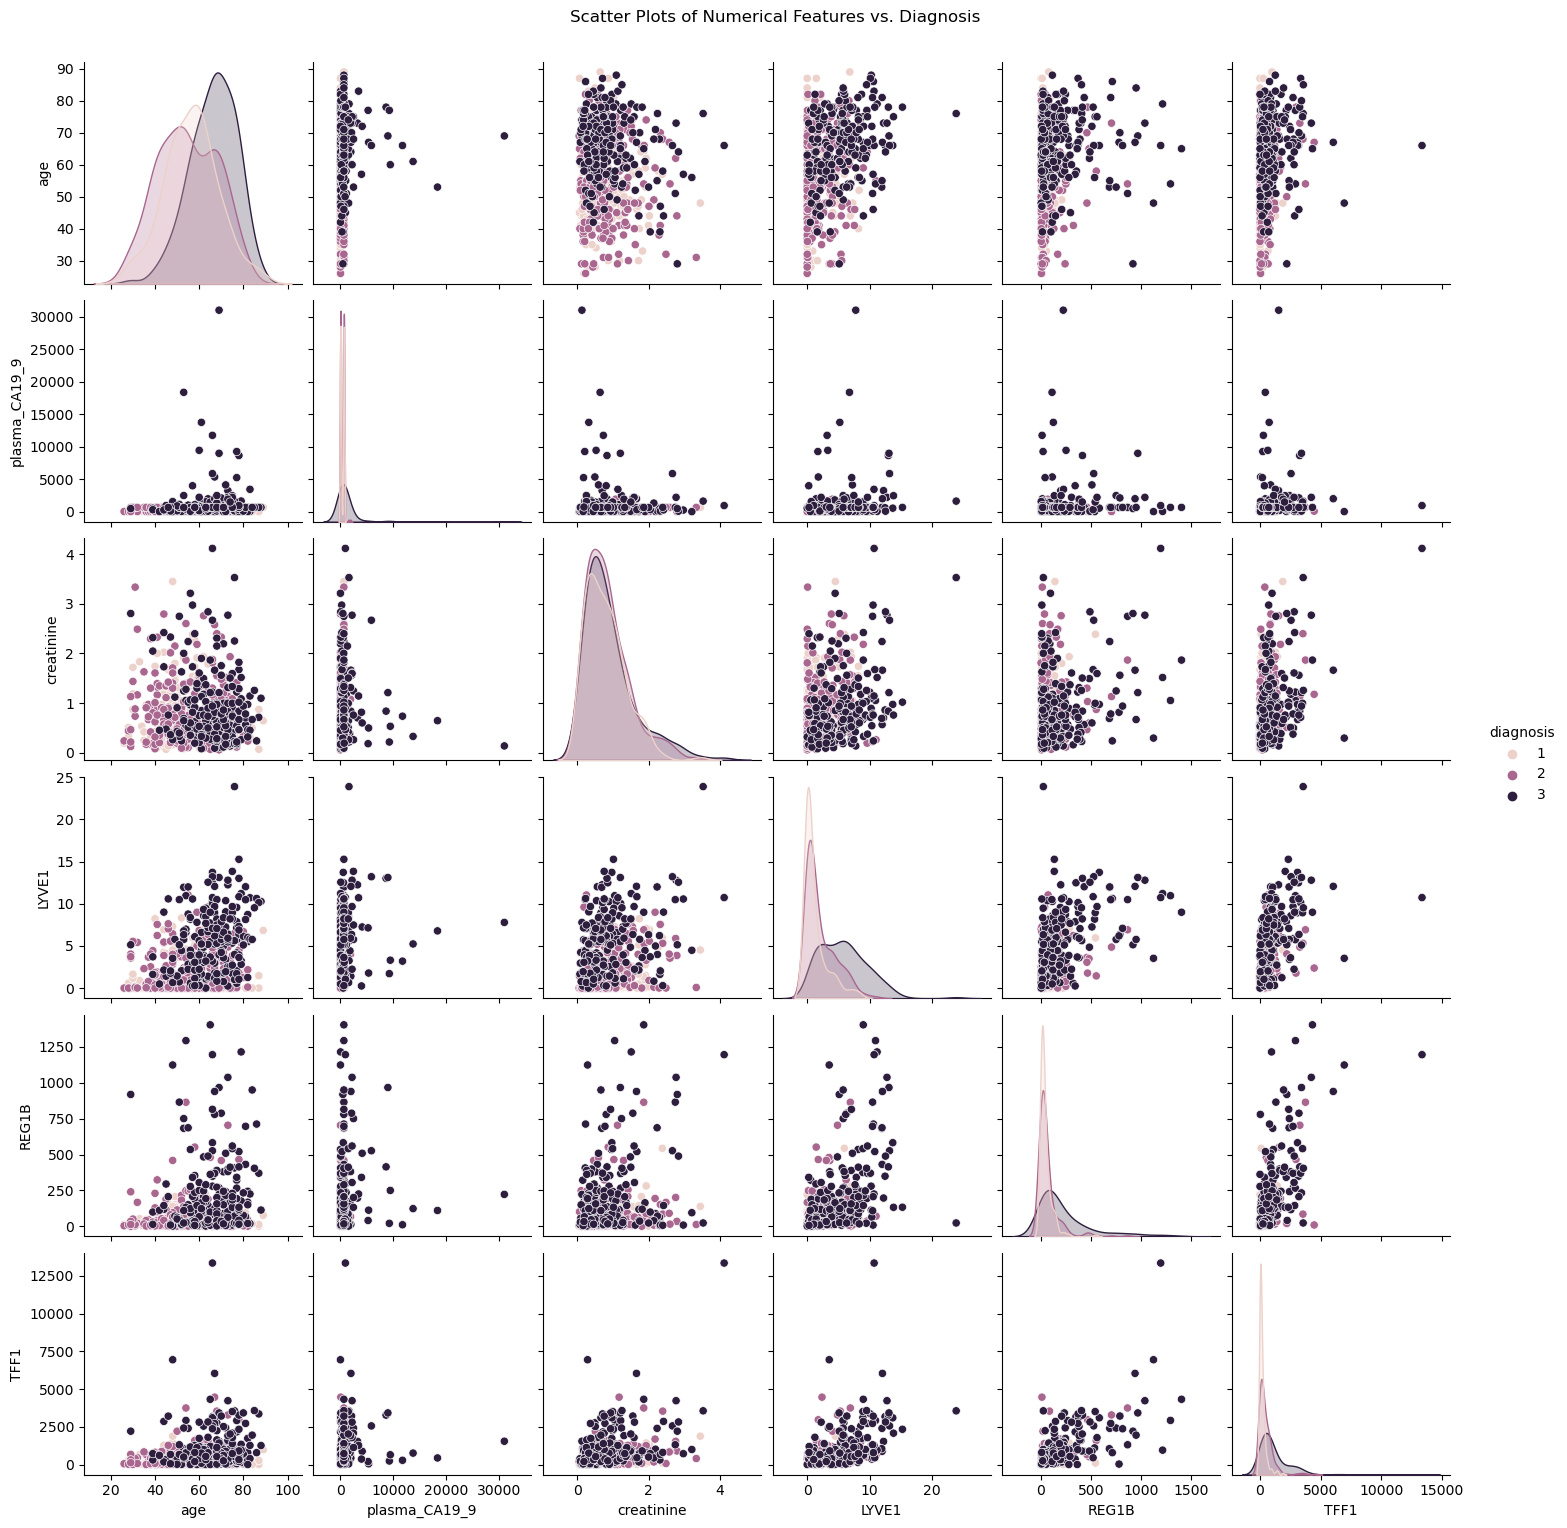

/var/folders/01/75h4kx1s6mdbs13q9d9n9r780000gn/T/ipykernel_10318/37782483.py:41: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


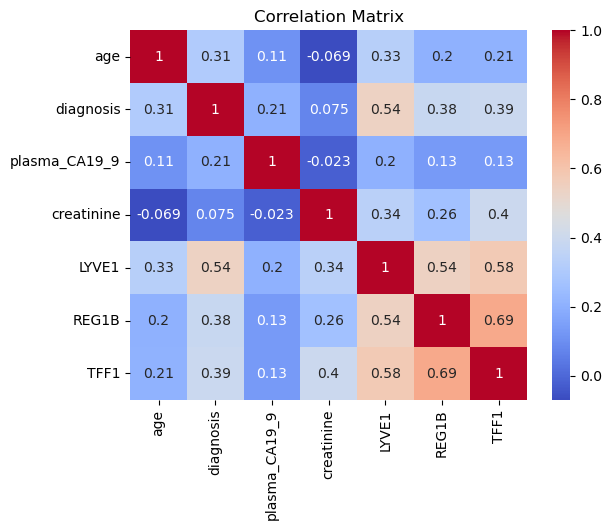

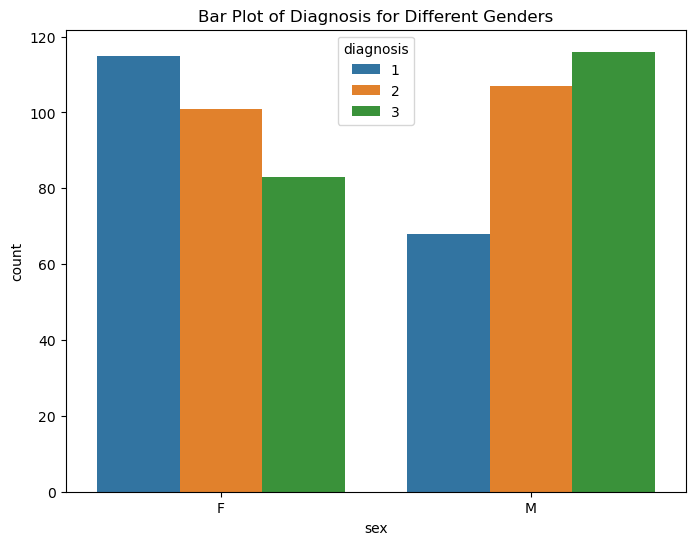

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
data = pd.read_csv('Debernardi et al 2020 data.csv')

# Handle missing data by removing incomplete records in the 'diagnosis' column
data.dropna(subset=['diagnosis'], inplace=True)

# Drop unnecessary columns 'sample_id', 'patient_cohort', 'stage', and 'benign_sample_diagnosis'
data.drop(columns=['sample_id', 'patient_cohort', 'stage', 'benign_sample_diagnosis'], inplace=True)

# Impute missing values in 'plasma_CA19_9' column with mean value
mean_CA19_9 = data['plasma_CA19_9'].mean()
data['plasma_CA19_9'].fillna(mean_CA19_9, inplace=True)

# Drop 'REG1A' column as it has a significant number of missing values
data.drop(columns=['REG1A'], inplace=True)

# Explore the data using descriptive statistics
print("Descriptive Statistics:")
print(data.describe())

# Visualize histograms of numerical features
data.hist(figsize=(10, 8), bins=20)
plt.suptitle("Histograms of Numerical Features", y=1.02)
plt.show()

# Visualize box plots of numerical features
data.boxplot(figsize=(10, 6))
plt.title("Box Plots of Numerical Features")
plt.show()

# Create scatter plots for numerical features vs. diagnosis
sns.pairplot(data, vars=['age', 'plasma_CA19_9', 'creatinine', 'LYVE1', 'REG1B', 'TFF1'], hue='diagnosis')
plt.suptitle("Scatter Plots of Numerical Features vs. Diagnosis", y=1.02)
plt.show()

# Calculate and visualize the correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Visualize bar plots for categorical features
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='diagnosis', data=data)
plt.title("Bar Plot of Diagnosis for Different Genders")
plt.show()


In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# List of selected features
selected_features = ['LYVE1', 'REG1B', 'TFF1', 'age', 'sex']

# Extract the selected features and create a subset of the data
selected_data = data[selected_features + ['diagnosis']]  # Include the target column

# Separate the target variable from the features
X = selected_data.drop(columns=['diagnosis'])
y = selected_data['diagnosis']

# Separate numeric and categorical columns
numeric_columns = ['LYVE1', 'REG1B', 'TFF1', 'age']
categorical_columns = ['sex']

# Initialize transformers for numeric and categorical columns
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse=False)  # Drop the first category to avoid multicollinearity

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

# Fit and transform the data
X_scaled = preprocessor.fit_transform(X)


/Users/durgapravallikakuchipudi/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# List of selected features
selected_features = ['LYVE1', 'REG1B', 'TFF1', 'age', 'sex']

# Extract the selected features and create a subset of the data
selected_data = data[selected_features + ['diagnosis']]  # Include the target column

# Separate the target variable from the features
X = selected_data.drop(columns=['diagnosis'])
y = selected_data['diagnosis']

# Separate numeric and categorical columns
numeric_columns = ['LYVE1', 'REG1B', 'TFF1', 'age']
categorical_columns = ['sex']

# Initialize transformers for numeric and categorical columns
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)  # Use sparse_output=False

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

# Fit and transform the data
X_scaled = preprocessor.fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.71      0.66      0.68        41
           2       0.48      0.41      0.44        39
           3       0.66      0.82      0.73        38

    accuracy                           0.63       118
   macro avg       0.62      0.63      0.62       118
weighted avg       0.62      0.63      0.62       118



In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[21 12  4]
 [14 19  8]
 [ 3  2 35]]

Classification Report:
               precision    recall  f1-score   support

           1       0.55      0.57      0.56        37
           2       0.58      0.46      0.51        41
           3       0.74      0.88      0.80        40

    accuracy                           0.64       118
   macro avg       0.62      0.64      0.63       118
weighted avg       0.63      0.64      0.63       118

